<a href="https://colab.research.google.com/github/basharbayatna/Data_Cleaning-/blob/main/Copy_of_DataCleaning(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
url = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/titanic_dirty (2).csv'
df = pd.read_csv(url)


- Read in the data with pandas
- display fisrt and last 5 rows

In [ ]:
df.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,$8.46,NaN,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,$51.86,E46,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,$21.08,NaN,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,$11.13,NaN,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",F,14.0,1,0,237736,$30.07,NaN,C


In [ ]:
df.tail()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
901,622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,$15.74,NaN,C
902,77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,$8.05,NaN,S
903,715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,$7.65,F G73,S
904,623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,$7.85,NaN,S
905,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,$23.45,NaN,S


-Summary info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   906 non-null    int64  
 1   PassengerId  906 non-null    int64  
 2   Survived     906 non-null    int64  
 3   Pclass       906 non-null    int64  
 4   Name         906 non-null    object 
 5   Sex          906 non-null    object 
 6   Age          723 non-null    float64
 7   SibSp        906 non-null    object 
 8   Parch        906 non-null    int64  
 9   Ticket       906 non-null    object 
 10  Fare         906 non-null    object 
 11  Cabin        207 non-null    object 
 12  Embarked     904 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 92.1+ KB


## 13 columns , 906 rows
## 6 numaric columns
## 7 string columns (object)

#B) Check Data Types, Fix, and Convert


In [ ]:
df.select_dtypes('object').columns

Index(['Name', 'Sex', 'SibSp', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')

- We need to convert both the SibSp and the Fare




In [ ]:
df['Fare'].value_counts()

,count
Fare,
$8.05,45
$13.00,42
$7.90,38
$7.75,35
$26.00,31
...,...
$14.11,1
$50.50,1
$5.00,1


-Yes we need to replace the $ sign

In [ ]:
df['Fare'] = df['Fare'].str.replace('$', '')
df['Fare'].head()

,Fare
0,7.25
1,71.28
2,7.93
3,53.10
4,8.05


-now we romoved all the $ sign, now we will convert the Fare to Float

In [ ]:
df['Fare'] = df['Fare'].astype(float)
df['Fare'].dtype

dtype('float64')

In [ ]:
df['Fare'].value_counts()

,count
Fare,
8.05,45
13.00,42
7.90,38
7.75,35
26.00,31
...,...
14.11,1
50.50,1
5.00,1


In [ ]:
df['SibSp'].value_counts()

,count
SibSp,
0,618
1,212
2,27
4,18
3,16
8,7
5,5
one,3


-We notice that there is one row that is typed one insted of 1

In [ ]:
df['SibSp']= df['SibSp'].replace({'one':1})
df['SibSp'].value_counts()

,count
SibSp,
0,618
1,212
2,27
4,18
3,16
8,7
5,5
1,3


In [ ]:
df['SibSp']= df['SibSp'].astype(float)

df['SibSp'].dtype

dtype('float64')

In [ ]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


#C) Drop Unwanted Columns

In [ ]:

df = df.drop(columns=['Unnamed: 0'], axis=1)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906 entries, 0 to 905
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  906 non-null    int64  
 1   Survived     906 non-null    int64  
 2   Pclass       906 non-null    int64  
 3   Name         906 non-null    object 
 4   Sex          906 non-null    object 
 5   Age          723 non-null    float64
 6   SibSp        906 non-null    float64
 7   Parch        906 non-null    int64  
 8   Ticket       906 non-null    object 
 9   Fare         906 non-null    float64
 10  Cabin        207 non-null    object 
 11  Embarked     904 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [ ]:
#df['SibSp']= df['SibSp'].rename('Sibilings')
#df.head()

rename_dict = {'SibSp': 'Sibilings', 'Parch':'Parents'}
df = df.rename(rename_dict, axis =1)
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,Sibilings,Parents,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.93,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.05,NaN,S


#E) Duplicate Rows

In [ ]:
duplicated_rows = df.duplicated()
duplicated_rows

,0
0,False
1,False
2,False
3,False
4,False
...,...
901,True
902,True
903,True
904,True


-there is 30 duplicates

In [ ]:
duplicaed_rows_false = df.duplicated(keep=False)
duplicaed_rows_false.sum()



#df.duplicated(keep=False).sum()



np.int64(30)

In [ ]:
df[duplicaed_rows_false].sort_values('PassengerId')

,PassengerId,Survived,Pclass,Name,Sex,Age,Sibilings,Parents,Ticket,Fare,Cabin,Embarked
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0.0,0,374746,8.05,NaN,S
902,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0.0,0,374746,8.05,NaN,S
899,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0.0,0,16966,134.50,E40,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0.0,0,16966,134.50,E40,C
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0.0,1,2691,14.45,NaN,C
896,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0.0,1,2691,14.45,NaN,C
892,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0.0,0,113794,26.55,NaN,S
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0.0,0,113794,26.55,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0.0,0,A/S 2816,8.05,NaN,S
898,465,0,3,"Maisner, Mr. Simon",male,NaN,0.0,0,A/S 2816,8.05,NaN,S


In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()


np.int64(0)

#F) Unique Identifiers

In [ ]:
num_unique_value= df.nunique()
num_unique_value

,0
Survived,2
Pclass,3
Sex,2
Age,89
Sibilings,7
Parents,7
Ticket,681
Fare,234
Cabin,148
Embarked,4


In [ ]:
num_unique_value= df.nunique()

unique_value_percent = num_unique_value/len(df)*100
unique_value_percent

,0
PassengerId,100.000000
Survived,0.224467
Pclass,0.336700
Name,100.000000
Sex,0.336700
Age,9.876543
Sibilings,0.785634
Parents,0.785634
Ticket,76.430976
Fare,26.262626


- we can see that the PassengerId and the Name is 100% Unique

In [ ]:
df = df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,Sibilings,Parents,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.05,NaN,S


-Dropping the name Column

In [ ]:
df = df.drop(columns='Name')

df.head()

,Survived,Pclass,Sex,Age,Sibilings,Parents,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1.0,0,A/5 21171,7.25,NaN,S
2,1,1,female,38.0,1.0,0,PC 17599,71.28,C85,C
3,1,3,female,26.0,0.0,0,STON/O2. 3101282,7.93,NaN,S
4,1,1,female,35.0,1.0,0,113803,53.10,C123,S
5,0,3,male,35.0,0.0,0,373450,8.05,NaN,S


#G) Missing Values

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Sibilings,0
Parents,0
Ticket,0
Fare,0
Cabin,687
Embarked,2


In [ ]:
nan_values = df.isna()
nan_percentage = nan_values/len(df)*100
nan_percentage.sum()


,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.865320
Sibilings,0.000000
Parents,0.000000
Ticket,0.000000
Fare,0.000000
Cabin,77.104377
Embarked,0.224467


-We can see that 19.8% of Sex column is NAN, 77.1% of Cabin column and 0.22% of the Embarked

<Axes: >

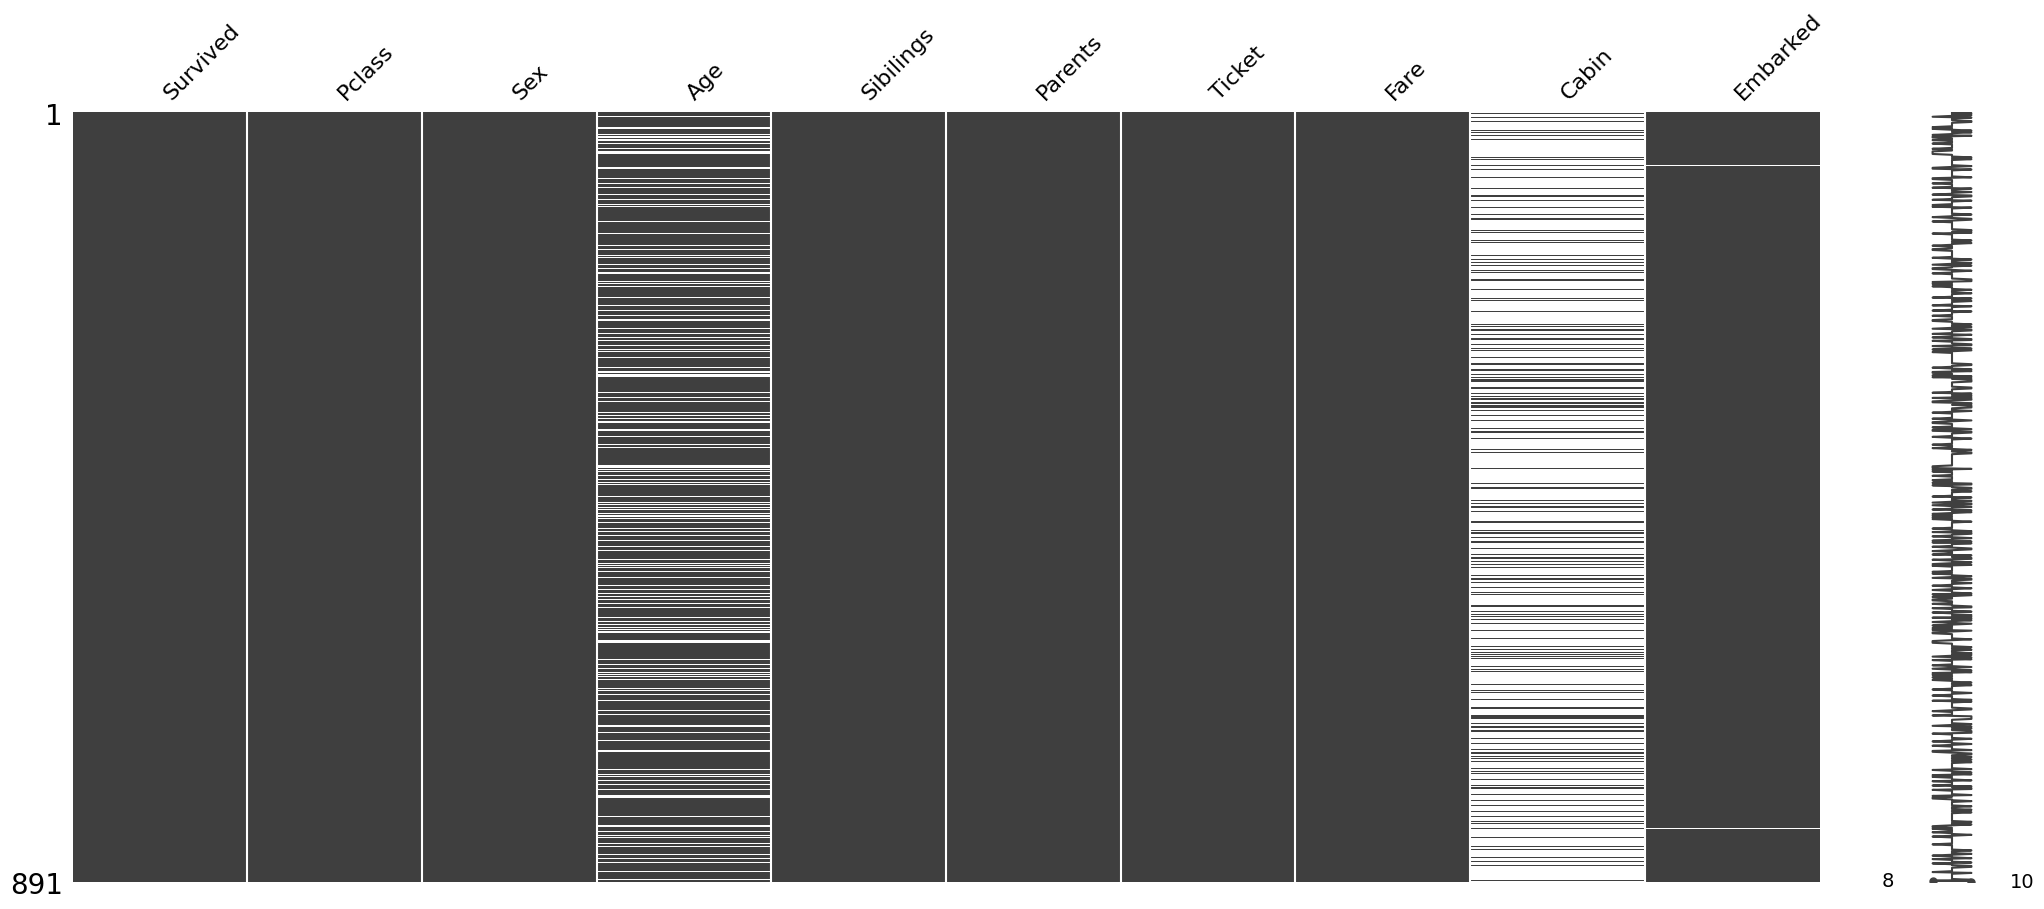

In [ ]:
import missingno as msno
msno.matrix(df)

-we need to fill the any NAN values in object with MISSING (Cabin , Embarked)

In [ ]:
object_col = df.select_dtypes('object').columns
df[object_col].isna().sum()

,0
Sex,0
Ticket,0
Cabin,687
Embarked,2


In [ ]:
df['Cabin'] = df['Cabin'].fillna('MISSING')
df['Cabin'].value_counts(dropna=False)

,count
Cabin,
MISSING,687
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
...,...
E17,1
A24,1
C50,1


we will do the same for the Embarked

In [ ]:
df['Embarked'] = df['Embarked'].fillna('MISSING')
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,75
MISSING,2
Queenstown,2


In [ ]:
num_col = df.select_dtypes('number').columns
df[num_col].isna().sum()

,0
Survived,0
Pclass,0
Age,177
Sibilings,0
Parents,0
Fare,0


-WE have 177 NAN Age values that we need to replace with placeholder value of -1

In [ ]:
df['Age'] = df['Age'].fillna(-1)
df['Age'].isna().sum()


np.int64(0)

In [ ]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Sibilings,0
Parents,0
Ticket,0
Fare,0
Cabin,0
Embarked,0


#H) Consistent Values

In [ ]:
object_col

Index(['Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,75
MISSING,2
Queenstown,2


In [ ]:
for i in object_col:
  print(f'Value count for {i}')
  print(df[i].value_counts())
  print('\n')
  print('\n')



Value count for Sex
Sex
male      574
female    313
F           4
Name: count, dtype: int64




Value count for Ticket
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64




Value count for Cabin
Cabin
MISSING        687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64




Value count for Embarked
Embarked
S             644
C             168
Q              75
MISSING         2
Queenstown      2
Name: count, dtype: int64






- As we can see there is inconsistent values in both 1) Sex where there is 4 F instead of Female

- in the Embarked 2 Queenstown instead of Q

In [ ]:
df['Sex'] = df['Sex'].replace('F', 'female')
df['Sex'].value_counts()

,count
Sex,
male,574
female,317


In [ ]:
df['Embarked']= df['Embarked'].replace('Queenstown', 'Q')
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77
MISSING,2


In [ ]:
data_Cleaning_core = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data-tittan-cleaned.csv'
df.to_csv(data_Cleaning_core, index = True)
loaded = pd.read_csv(data_Cleaning_core ,index_col='PassengerId')

loaded.head(10)

,Survived,Pclass,Sex,Age,Sibilings,Parents,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1.0,0,A/5 21171,7.25,MISSING,S
2,1,1,female,38.0,1.0,0,PC 17599,71.28,C85,C
3,1,3,female,26.0,0.0,0,STON/O2. 3101282,7.93,MISSING,S
4,1,1,female,35.0,1.0,0,113803,53.10,C123,S
5,0,3,male,35.0,0.0,0,373450,8.05,MISSING,S
6,0,3,male,-1.0,0.0,0,330877,8.46,MISSING,Q
7,0,1,male,54.0,0.0,0,17463,51.86,E46,S
8,0,3,male,2.0,3.0,1,349909,21.08,MISSING,S
9,1,3,female,27.0,0.0,2,347742,11.13,MISSING,S
